<a href="https://colab.research.google.com/github/UmaliPrinceGenel/CSST101-3B-1AY2526/blob/main/Assessment_Task_No_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Individual Case Study: Who Gets the Scholarship?**


Scenario
The Dean’s Office has rules:
1. If a student has high grades, is a student leader, and applied, then they are
Eligible.
2. If a student is Eligible, then they get a Scholarship.
3. If a student has a Scholarship, then they receive FinancialSupport.

Facts:

  • Juan: HighGrades, Applied.

  • Maria: HighGrades, DidNotApply.

  • Carlos: StudentLeader, NoHighGrades.

  • Ana: HighGrades, StudentLeader, Applied.


**Part 1 – Unification**

In [27]:
def unify(p1, p2):
    f1, f2 = p1.split("(")[0], p2.split("(")[0]
    if f1 != f2: return "Cannot be unified"

    a1, a2 = p1[p1.find("(")+1:-1].split(","), p2[p2.find("(")+1:-1].split(",")
    if len(a1) != len(a2): return "Cannot be unified"

    subs = {}
    for x, y in zip(a1, a2):
        x, y = x.strip(), y.strip()
        if x == y: continue
        if x.islower(): subs[x] = y
        elif y.islower(): subs[y] = x
        else: return "Cannot be unified"

    return subs or "Already unified"

print("Unify Eligible(x) → Scholarship(x) with Eligible(Ana):")
print("Substitution set:", unify("Eligible(x)", "Eligible(Ana)"))

Unify Eligible(x) → Scholarship(x) with Eligible(Ana):
Substitution set: {'x': 'Ana'}


**Part 2 – Forward Chaining**

In [30]:
facts = {
    "HighGrades(Juan)", "Applied(Juan)",
    "HighGrades(Maria)", "DidNotApply(Maria)",
    "StudentLeader(Carlos)", "NoHighGrades(Carlos)",
    "HighGrades(Ana)", "StudentLeader(Ana)", "Applied(Ana)"
}
rules = [
    (["HighGrades", "StudentLeader", "Applied"], "Eligible"),
    (["Eligible"], "Scholarship"),
    (["Scholarship"], "FinancialSupport")
]

def get_name(fact):
    return fact[fact.find("(")+1:-1]

def get_pred(fact):
    return fact[:fact.find("(")]

for condition_list, conclusion in rules:

    person_facts = {}
    for f in facts:
        name = get_name(f)
        pred = get_pred(f)
        if name not in person_facts:
            person_facts[name] = set()
        person_facts[name].add(pred)

    for name, preds in person_facts.items():
        if all(cond in preds for cond in condition_list):
            new_fact = f"{conclusion}({name})"
            facts.add(new_fact)

juan_facts = {get_pred(f): True for f in facts if get_name(f) == "Juan"}
ana_facts = {get_pred(f): True for f in facts if get_name(f) == "Ana"}

print(f"Juan's derived facts: {juan_facts}")
print(f"Ana's derived facts:  {ana_facts}")
print()
print("Why Maria is NOT eligible:")
print("Ans: Maria lacks StudentLeader And did not Apply.")
print("Why Carlos is NOT eligible:")
print("Ans: Carlos lacks HighGrades And did not Apply.")

Juan's derived facts: {'HighGrades': True, 'Applied': True}
Ana's derived facts:  {'HighGrades': True, 'StudentLeader': True, 'Scholarship': True, 'Eligible': True, 'Applied': True, 'FinancialSupport': True}

Why Maria is NOT eligible:
Ans: Maria lacks StudentLeader And did not Apply.
Why Carlos is NOT eligible:
Ans: Carlos lacks HighGrades And did not Apply.


**Part 3 – Backward Chaining**

In [46]:
facts = {
    "HighGrades(Juan)", "Applied(Juan)",
    "HighGrades(Maria)", "DidNotApply(Maria)",
    "StudentLeader(Carlos)", "NoHighGrades(Carlos)",
    "HighGrades(Ana)", "StudentLeader(Ana)", "Applied(Ana)"
}

def is_false(goal):
    if goal.startswith("Applied("):
        name = goal[goal.find("(")+1:goal.find(")")]
        return f"DidNotApply({name})" in facts
    if goal.startswith("HighGrades("):
        name = goal[goal.find("(")+1:goal.find(")")]
        return f"NoHighGrades({name})" in facts
    return False


def prove(goal):
    if goal in facts:
        return True
    if is_false(goal):
        return False

    if goal.startswith("Eligible("):
        name = goal[goal.find("(")+1:goal.find(")")]
        premises = ["HighGrades(x)", "StudentLeader(x)", "Applied(x)"]
        return all(prove(p.replace("x", name)) for p in premises)

    if goal.startswith("Scholarship("):
        name = goal[goal.find("(")+1:goal.find(")")]
        return prove(f"Eligible({name})")

    if goal.startswith("FinancialSupport("):
        name = goal[goal.find("(")+1:goal.find(")")]
        return prove(f"Scholarship({name})")

    return False

print("Scholarship(Maria)?", prove("Scholarship(Maria)"))
print("FinancialSupport(Ana)?", prove("FinancialSupport(Ana)"))

Scholarship(Maria)? False
FinancialSupport(Ana)? True


**Part 4 – Validity Check**

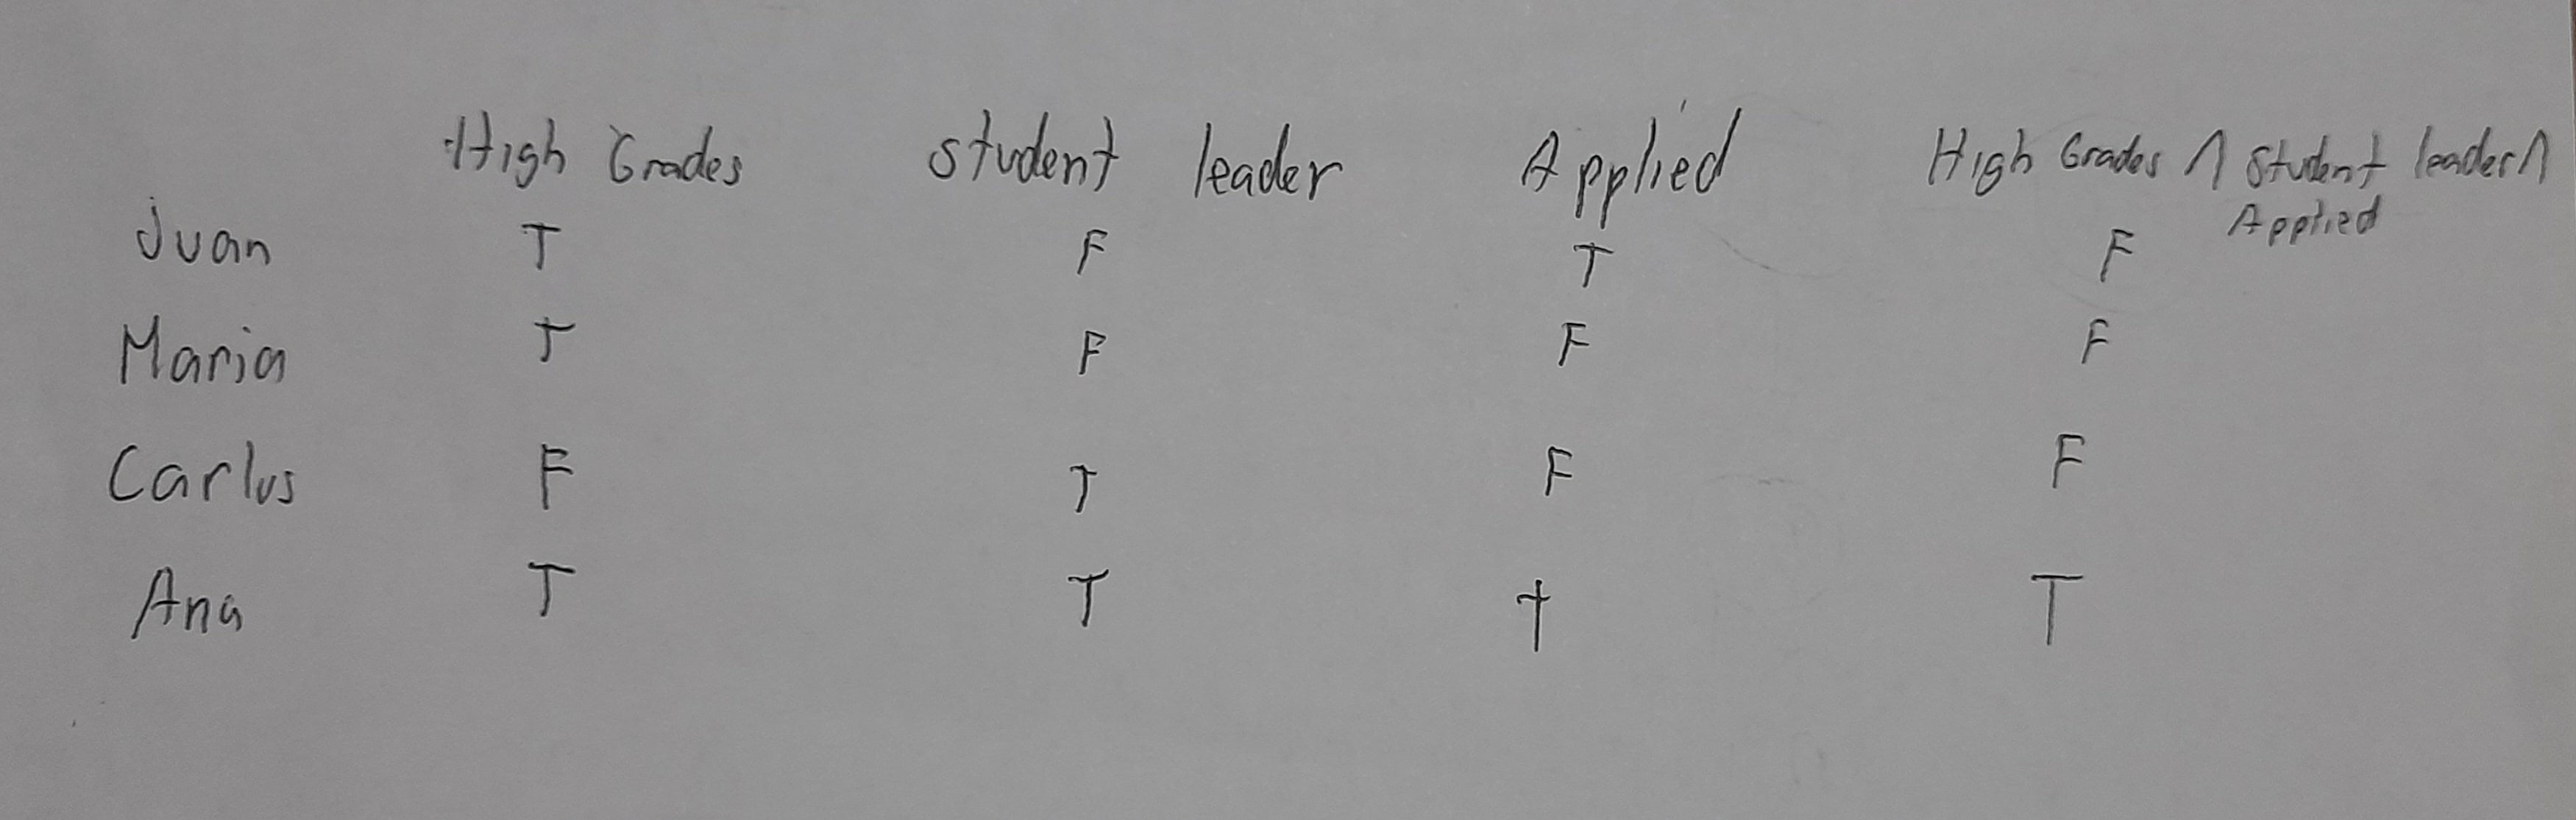

**Part 5 – Reflection**

Why is logical reasoning important in AI and real-life decision making?

Logical reasoning is important in AI because it helps the machine model to have a smart decisions to have a best result. In real life, we use this kind of thinking all the time in our daily life, like who to vote for in election, or budgeting our allowance. Without logic, both AI and human world can have wrong choices which will led to be messy and unorganized.